## Getting Data

In [15]:
# importing libraries
import time
import math
import datetime
import requests
import html5lib
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

from tqdm import tqdm
from urllib.error import HTTPError
from datetime import datetime as dt
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import clear_output

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, confusion_matrix

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [16]:
# defining team names and columns

fullteamDict = {'Tampa Bay Buccaneers':'tam','Buffalo Bills':'buf','Washington Commanders':'was','Washington Redskins':'was','Arizona Cardinals':'crd','Los Angeles Rams':'ram','St. Louis Rams':'ram','Green Bay Packers':'gnb','Dallas Cowboys':'dal','Los Angeles Chargers':'sdg','Oakland Raiders':'rai','San Diego Chargers':'sdg','Baltimore Ravens':'rav', 'Tennessee Titans':'oti', 'Cincinnati Bengals':'cin', 'New Orleans Saints':'nor','Kansas City Chiefs':'kan','Cleveland Browns':'cle','Las Vegas Raiders':'rai','Minnesota Vikings':'min','Indianapolis Colts':'clt','New England Patriots':'nwe','San Francisco 49ers':'sfo','Seattle Seahawks':'sea','Pittsburgh Steelers':'pit','Denver Broncos':'den','Washington Football Team':'was','Atlanta Falcons':'atl','Philadelphia Eagles':'phi', 'Chicago Bears':'chi', 'Carolina Panthers':'car','Miami Dolphins':'mia', 'New York Giants':'nyg', 'Jacksonville Jaguars':'jax','Houston Texans':'htx', 'New York Jets':'nyj', 'Detroit Lions':'det'}
currentteamDict = {'Tampa Bay Buccaneers':'tam','Buffalo Bills':'buf','Washington Commanders':'was','Arizona Cardinals':'crd','Los Angeles Rams':'ram','Green Bay Packers':'gnb','Dallas Cowboys':'dal','Los Angeles Chargers':'sdg','Oakland Raiders':'rai','Baltimore Ravens':'rav', 'Tennessee Titans':'oti', 'Cincinnati Bengals':'cin', 'New Orleans Saints':'nor','Kansas City Chiefs':'kan','Cleveland Browns':'cle','Las Vegas Raiders':'rai','Minnesota Vikings':'min','Indianapolis Colts':'clt','New England Patriots':'nwe','San Francisco 49ers':'sfo','Seattle Seahawks':'sea','Pittsburgh Steelers':'pit','Denver Broncos':'den','Atlanta Falcons':'atl','Philadelphia Eagles':'phi', 'Chicago Bears':'chi', 'Carolina Panthers':'car','Miami Dolphins':'mia', 'New York Giants':'nyg', 'Jacksonville Jaguars':'jax','Houston Texans':'htx', 'New York Jets':'nyj', 'Detroit Lions':'det'}
reverseDict = dict((v, k) for k, v in fullteamDict.items())
teamDict = {'Buccaneers':'tam','Bills':'buf','Cardinals':'crd','Rams':'ram','Packers':'gnb','Cowboys':'dal','Chargers':'sdg','Ravens':'rav', 'Titans':'oti', 'Bengals':'cin', 'Saints':'nor', 'Chiefs':'kan','Browns':'cle', 'Raiders':'rai', 'Vikings':'min','Colts':'clt', 'Patriots':'nwe', 'ers':'sfo','Seahawks':'sea', 'Steelers':'pit','Broncos':'den', 'Washington':'was', 'Commanders':'was','Falcons':'atl','Eagles':'phi', 'Bears':'chi', 'Panthers':'car','Dolphins':'mia', 'Giants':'nyg','Jaguars':'jax','Texans':'htx', 'Jets':'nyj', 'Lions':'det'}
teams = list(set(fullteamDict.values()))
cols = ['Week','Day','Date','Type','Outcome','Overtime','At','Name','TeamScore','OppScore','PCmp', 'PAtt','PYds', 'PTD', 'Int', 'Sk', 'SkYds', 'PY/A', 'PNY/A', 'Cmp%', 'Rate', 'RAtt','RYds', 'RY/A', 'RTD', 'FGM', 'FGA', 'XPM', 'XPA', 'Pnt', 'PuntYds', '3DConv','3DAtt', '4DConv', '4DAtt', 'ToP']
oppcols = [i+'_Opp' for i in cols] + ['Home_Opp','Away_Opp','Key']
dropcols = ['Day', 'Date', 'Type', 'Outcome', 'Overtime', 'Name','ToP', 'Home', 'Away','Week_Opp', 'Day_Opp','Date_Opp', 'Type_Opp', 'Outcome_Opp', 'Overtime_Opp', 'At_Opp','Name_Opp', 'TeamScore_Opp', 'OppScore_Opp','Cmp%','Cmp%_Opp','ToP_Opp', 'Home_Opp', 'Away_Opp']
feats = list(set(['Away Odds Close','TeamScore_Home','OppScore_Home','PCmp_Home','PAtt_Home','PYds_Home','PTD_Home','Int_Home','Sk_Home','SkYds_Home','PY/A_Home','PNY/A_Home','Rate_Home','RAtt_Home','RYds_Home','RY/A_Home','RTD_Home','FGM_Home','FGA_Home','XPM_Home','XPA_Home','Pnt_Home','PuntYds_Home','3DConv_Home','3DAtt_Home','4DConv_Home','4DAtt_Home','PCmp_Opp_Home','PAtt_Opp_Home','PYds_Opp_Home','PTD_Opp_Home','Int_Opp_Home','Sk_Opp_Home','SkYds_Opp_Home','PY/A_Opp_Home','PNY/A_Opp_Home','Rate_Opp_Home','RAtt_Opp_Home','RYds_Opp_Home','RY/A_Opp_Home','RTD_Opp_Home','FGM_Opp_Home','FGA_Opp_Home','XPM_Opp_Home','XPA_Opp_Home','Pnt_Opp_Home','PuntYds_Opp_Home','3DConv_Opp_Home','3DAtt_Opp_Home','4DConv_Opp_Home','4DAtt_Opp_Home','TeamScore_Away','OppScore_Away','PCmp_Away','PAtt_Away','PYds_Away','PTD_Away','Int_Away','Sk_Away','SkYds_Away','PY/A_Away','PNY/A_Away','Rate_Away','RAtt_Away','RYds_Away','RY/A_Away','RTD_Away','FGM_Away','FGA_Away','XPM_Away','XPA_Away','Pnt_Away','PuntYds_Away','3DConv_Away','3DAtt_Away','4DConv_Away','4DAtt_Away','PCmp_Opp_Away','PAtt_Opp_Away','PYds_Opp_Away','PTD_Opp_Away','Int_Opp_Away','Sk_Opp_Away','SkYds_Opp_Away','PY/A_Opp_Away','PNY/A_Opp_Away','Rate_Opp_Away','RAtt_Opp_Away','RYds_Opp_Away','RY/A_Opp_Away','RTD_Opp_Away','FGM_Opp_Away','FGA_Opp_Away','XPM_Opp_Away','XPA_Opp_Away','Pnt_Opp_Away','PuntYds_Opp_Away','3DConv_Opp_Away','3DAtt_Opp_Away','4DConv_Opp_Away','4DAtt_Opp_Away']))

In [17]:
# defining data gathering functions 

def request(team,year):    
    url = f'https://www.pro-football-reference.com/teams/{team}/{year}/gamelog/'
    header = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36","X-Requested-With": "XMLHttpRequest"}
    r = requests.get(url, headers=header)
    print('\r',end='')
    print(f'Status: {r.status_code}',end='')
    try:
        if len(pd.read_html(r.text)) > 2:
            opptable = 2
        else:
            opptable = 1
    except: pass
    if r.status_code != 200:
        waittime = int(r.headers["Retry-After"])
        for l in range(waittime+2):
            print('\r',end='')
            print(f'Time till next request: {waittime-l}, {round((waittime-l)/60,2)} mins',end='')
            time.sleep(1)
    return r.text, opptable

def get(team,year,html,table):
    df = pd.read_html(html)[table]
    df.columns = cols
    #df.loc[:,8:] = df.iloc[:,8:].shift().rolling(3).mean()
    df['Home'] = [fullteamDict[i] if j == '@' else team for i,j in zip(df['Name'],df['At'])]
    df['Away'] = [fullteamDict[i] if j != '@' else team for i,j in zip(df['Name'],df['At'])]
    df['Date'] = pd.to_datetime([i + ' ' + str(year+1) if 'Jan' in i else i + ' ' + str(year+1) if 'Feb' in i else i + ' ' + str(year) for i in df['Date']])
    df['Key'] = df['Date'].astype(str) + df['Home'] + df['Away']
    return df

def complete(team,year):
    html, opptable = request(team,year)
    df = get(team,year,html,0)
    opp = get(team,year,html,opptable)
    if opptable == 2:
        df = df.append(get(team,year,html,1))
        opp = opp.append(get(team,year,html,3))
    opp.columns = oppcols
    df.loc[:,8:-4] = df.iloc[:,8:-4].shift().rolling(3).mean()
    opp.loc[:,8:-4] = opp.iloc[:,8:-4].shift().rolling(3).mean()
    data = df.merge(opp,on='Key')
    return data
    
def save(df, data_old):
    home = df[df['At']!='@']
    away = df[df['At']=='@']
    home.columns = [i+'_Home' for i in df.columns]
    away.columns = [i+'_Away' for i in df.columns]

    data = home.merge(away,left_on='Key_Home',right_on='Key_Away')
    datafeats = [i for i in feats if i not in ['Away Odds Close', 'playoff']]
    data = pd.concat([data_old,data]).dropna(subset=datafeats)
    data.to_csv('nfl.csv')
    
def interp(mislist,df,col,key):
    result = []
    for mis in mislist:
        div = 10
        one = df[df[key]== round((mis*100 - (mis*100)%div)/100,2)].reset_index()[col].iloc[0]
        two = df[df[key]== round(((mis+0.1)*100 - (mis*100)%div)/100,2)].reset_index()[col].iloc[0]
        
        bounds = np.array([one,two])

        low = bounds.min()
        high = bounds.max()
    
        ratio = ((mis*100)%div) / div
        diff = high - low 
        prob = one + abs(diff)*ratio if one<two else one - abs(diff)*ratio
        prob = low + abs(diff)*ratio 
        result.append(prob)
    return result

In [28]:
# grabbing stored data

# how up to date do you need to be?
maxdate = datetime.datetime(year=2023,month=2,day=12)

data_old = pd.read_csv('nfl.csv',index_col=0)
data_old['KeyDate'] = pd.to_datetime(data_old['Key_Home'].str[:10])
dropteams = list(set([i[10:13] for i in data_old[data_old['KeyDate']>=maxdate]['Key_Home']]))
dropteams += (list(set([i[13:] for i in data_old[data_old['KeyDate']>=maxdate]['Key_Home']])))
getteams = [i for i in teams if i not in dropteams]
maxyr = maxdate.year if maxdate.month > 3 else maxdate.year-1
minyr = data_old['KeyDate'].max().year

print(f"Getting data for {len(getteams)} teams")

Getting data for 30 teams


In [699]:
# getting data

big = 1
total = 1
waittime = 1
df = pd.DataFrame()
for j in range(minyr,maxyr+1):
    lil = 1
    for i in getteams:
        clear_output()
        time.sleep(1)
        print(i,j)
        print(f'Team {lil} / {len(getteams)} - {lil/len(getteams)}')
        print(f'Year {big} / {maxyr+1-minyr} - {big/(maxyr+1-minyr)}')
        print(f'Total {total} / {(maxyr+1-minyr)*len(getteams)} - {total / ((maxyr+1-minyr)*len(getteams))}')

        try:
            if i == getteams[0] and j == minyr:
                df = complete(i,j)
                save(df,data_old)
                
            else:
                df = pd.concat([df,complete(i,j)])
                df.drop(columns=dropcols,inplace=True)
                save(df,data_old)

        except HTTPError as e:
                waittime = int(e.headers['Retry-After'])

        lil+=1
        total+=1
    big+=1

min 2022
Team 32 / 32 - 1.0
Year 1 / 1 - 1.0
Total 32 / 32 - 1.0
Status: 200

In [5]:
# merging with historical odds data

data = pd.read_csv('nfl.csv',index_col=0)
elodata = pd.read_csv('https://projects.fivethirtyeight.com/nfl-api/nfl_elo.csv')

# loading gambling data
spreadDf = pd.read_excel('http://www.aussportsbetting.com/historical_data/nfl.xlsx')
spreadDf['Home Team'] = spreadDf['Home Team'].map(fullteamDict)
spreadDf['Away Team'] = spreadDf['Away Team'].map(fullteamDict)
spreadDf = spreadDf[['Date','Away Team','Home Team','Playoff Game?','Away Line Close','Away Odds Close','Home Odds Close','Total Score Close']]

# standardizing team names
elonames = {'hou':'htx','lac':'sdg','ari':'crd','sf':'sfo','oak':'rai','no':'nor','ind':'clt','bal':'rav','lar':'ram','tb':'tam','ten':'oti','gb':'gnb','kc':'kan','wsh':'was','ne':'nwe','atl':'atl','rav':'rav','buf':'buf','car':'car','chi':'chi','cin':'cin','cle':'cle','dal':'dal','den':'den','det':'det','jax':'jax','mia':'mia','min':'min','nyg':'nyg','nyj':'nyj','phi':'phi','pit':'pit','sea':'sea'}
elodata['away'] = elodata['team2'].str.lower().map(elonames)
elodata['home'] = elodata['team1'].str.lower().map(elonames)

# adjusting elo values, cropping
elodata['eloaway'] = elodata['elo2_pre'] + elodata['qb2_adj']
elodata['elohome'] = elodata['elo1_pre'] + elodata['qb1_adj']
elodata.rename(columns={'score2':'scoreaway','score1':'scorehome'},inplace=True)
elodata = elodata[['date','season','away','home','eloaway','elohome','quality','scoreaway','scorehome','playoff']]

# merging
elodata['date'] = pd.to_datetime(elodata['date'])
elodata = elodata[elodata['date']>'2000-01-01']
elodata = elodata.merge(spreadDf, left_on=['date','away','home'],right_on=['Date','Away Team','Home Team'])

# creating targets
elodata['point_diff'] = elodata['scoreaway'] - elodata['scorehome']
elodata['win'] = (elodata['point_diff']>0).astype(int)
elodata['cover'] = (elodata['point_diff']>-elodata['Away Line Close']).astype(int)
elodata['Key'] = elodata['date'].astype(str) + elodata['home'] + elodata['away']
elodata['playoff'] = elodata['playoff'].map({'w':1,'d':1,'c':1,'s':1}).fillna(0)
data = elodata.merge(data, left_on='Key',right_on='Key_Home').dropna(subset=feats).drop_duplicates(subset='Key')
data['playoff'] = [0 if i == 0 else 1 for i in data['playoff']]
data.to_csv('nflandelo.csv')

## Training Classifier and Testing Model

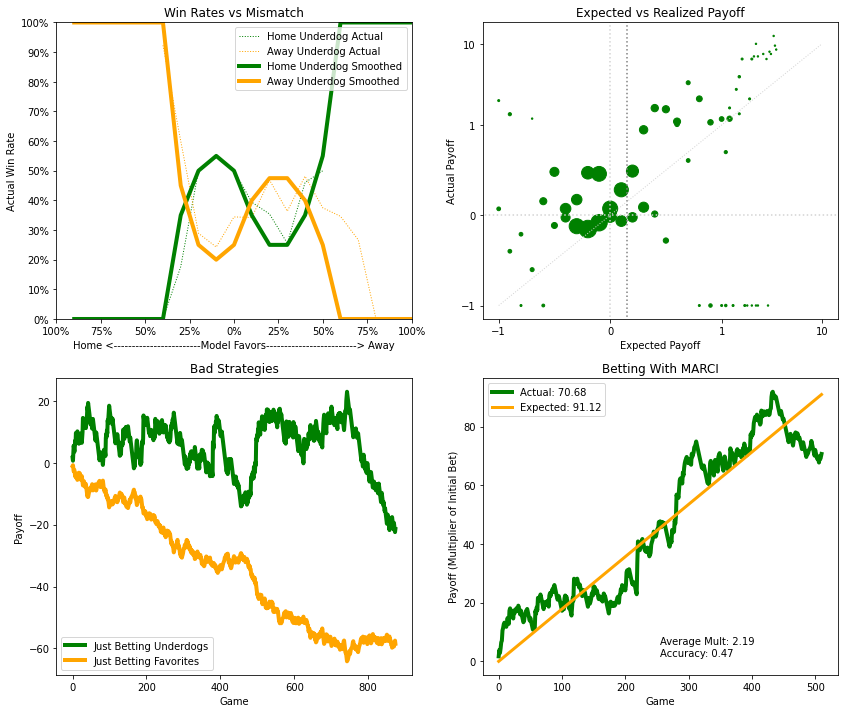

In [6]:
# splitting

splitdata = data#[data['playoff']==0]
traindata = splitdata[splitdata['season'] < 2019]
testdata = splitdata[splitdata['season'] >= 2019].reset_index()

# fitting

evthresh = 0.15

scaler = MaxAbsScaler().fit(data[feats])

X_train = traindata[feats]
X_train = scaler.transform(traindata[feats])
y_train = traindata['win']

X_test = testdata[feats]
X_test = scaler.transform(testdata[feats])
y_test = testdata['win']

clf = GradientBoostingClassifier(n_estimators=280, learning_rate=1, max_depth=1, random_state=0).fit(X_train, y_train)

testdata['pred_win'] = clf.predict(X_test)
testdata['pred_proba'] = [i[1] for i in clf.predict_proba(X_test)]
testdata['away_mult'] = testdata['Away Odds Close']
testdata['home_mult'] = testdata['Home Odds Close']
testdata['implied_proba'] = (1/testdata['Away Odds Close']) / (1/testdata['Away Odds Close'] + 1/testdata['Home Odds Close'])
testdata['mismatch'] = testdata['pred_proba'] - testdata['implied_proba'] 

# identifying underdogs

testdata['underdogwin'] = [1 if w==1 and a>h or w==0 and a<h else 0 for w,a,h in zip(testdata['win'],testdata['away_mult'],testdata['home_mult'])]
testdata['awaydog'] = [1 if a>2 else 0 for a in testdata['away_mult']]
testdata['homedog'] = [1 if h>2 else 0 for h in testdata['home_mult']]
testdata['awaydogwin'] = [1 if u==1 and w==1 else 0 for u,w in zip(testdata['underdogwin'],testdata['win'])]
testdata['homedogwin'] = [1 if u==1 and w==0 else 0 for u,w in zip(testdata['underdogwin'],testdata['win'])]
testdata['underdogmult'] = np.array([a-1 if a>h and u==1 else h-1 if a<h and u==1 else -1 for a,h,u in zip(testdata['away_mult'],testdata['home_mult'],testdata['underdogwin'])]).cumsum()
testdata['favoritewin'] = [1 if w==1 and a<h or w==0 and a>h else 0 for w,a,h in zip(testdata['win'],testdata['away_mult'],testdata['home_mult'])]
testdata['favoritemult'] = np.array([a-1 if a<h and u==1 else h-1 if a>h and u==1 else -1 for a,h,u in zip(testdata['away_mult'],testdata['home_mult'],testdata['favoritewin'])]).cumsum()

# finding dog probs

mlabels = [-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]
mbins = [-1,-.9,-.8,-.7,-.6,-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
testdata['mismatch_binned'] = pd.cut(testdata['mismatch'], bins=mbins, labels=mlabels)
mismatch_agg = testdata.groupby(['mismatch_binned']).agg({'win':'mean','awaydog':'mean','homedog':'mean','awaydogwin':'mean','homedogwin':'mean','underdogwin':'mean'}).reset_index()

mismatch_agg['awaydogwin_proba'] = [  1,  1,  1,  1,  1,   1, 0.45, 0.25, 0.20, 0.25, 0.40, 0.475, 0.475, 0.40, 0.25,   0,  0, 0, 0,  0]
mismatch_agg['homefavwin_proba'] = 1-mismatch_agg['awaydogwin_proba']

mismatch_agg['homedogwin_proba'] = [  0,  0,  0,  0,  0,  0, 0.35, 0.50, 0.55, 0.50, 0.35,  0.25,  0.25, 0.35, 0.55,   1,  1, 1, 1,  1]
mismatch_agg['awayfavwin_proba'] = 1-mismatch_agg['homedogwin_proba']

mismatch_agg['awaydogwin_real'] = mismatch_agg['awaydogwin'] / mismatch_agg['awaydog']
mismatch_agg['homedogwin_real'] = mismatch_agg['homedogwin'] / mismatch_agg['homedog']
mismatch_agg['homedogwin_real'][:6] = [0,0,0,0,0,0]
mismatch_agg['mismatch'] = mbins[1:]

testdata['home_dog_proba'] = interp(testdata['mismatch'],mismatch_agg,'homedogwin_proba','mismatch')
testdata['away_dog_proba'] = interp(testdata['mismatch'],mismatch_agg,'awaydogwin_proba','mismatch')

testdata['home_proba'] = [hdp if hd==1 else (1-adp) for hdp,hd,adp in zip(testdata['home_dog_proba'],testdata['homedog'],testdata['away_dog_proba'])]
testdata['away_proba'] = [adp if ad==1 else (1-hdp) for adp,ad,hdp in zip(testdata['away_dog_proba'],testdata['awaydog'],testdata['home_dog_proba'])]
testdata['home_ev'] = ((testdata['home_proba']) * (testdata['home_mult']-1)) - (1-testdata['home_proba'])
testdata['away_ev'] = ((testdata['away_proba']) * (testdata['away_mult']-1)) - (1-testdata['away_proba'])
testdata['home_v'] = [h-1 if w==0 else -1 for h,w in zip(testdata['home_mult'],testdata['win'])]
testdata['away_v'] = [a-1 if w==0 else -1 for a,w in zip(testdata['away_mult'],testdata['win'])]

testdata['max_ev'] = [h if h>a else a for h,a in zip(testdata['home_ev'],testdata['away_ev'])]
testdata['real_v'] = [a-1 if w==1 and mev==aev else h-1 if w==0 and mev==hev else -1 for a,h,mev,aev,hev,w in zip(testdata['away_mult'],testdata['home_mult'],testdata['max_ev'],testdata['away_ev'],testdata['home_ev'],testdata['win'])]

## excluding favorites
testdata['bet_home'] = [1 if h>evthresh and hm>2 else None for h,hm in zip(testdata['home_ev'],testdata['home_mult'])]
testdata['bet_away'] = [1 if a>evthresh and am>2 else None for a,am in zip(testdata['away_ev'],testdata['away_mult'])]

## including favorites
testdata['bet_home'] = [1 if h>evthresh and h>a else None for h,a in zip(testdata['home_ev'],testdata['away_ev'])]
testdata['bet_away'] = [1 if a>evthresh and a>h else None for a,h in zip(testdata['away_ev'],testdata['home_ev'])]

testdata['potential'] = [a-1 if ba==1 else h-1 if bh==1 else None for a,h,ba,bh in zip(testdata['away_mult'],testdata['home_mult'],testdata['bet_away'],testdata['bet_home'])]
testdata['bet'] = [1 if h==1 or a==1 else None for h,a in zip(testdata['bet_away'],testdata['bet_home'])]

# finding winnings

temp_ev = testdata.dropna(subset=['bet']).reset_index()
temp_ev['correct'] = [1 if h==1 and w==0 or a==1 and w==1 else 0 for h,a,w in zip(temp_ev['bet_home'],temp_ev['bet_away'],temp_ev['win'])]
temp_ev['mult'] = np.array([a-1 if ba==1 and c==1 else h-1 if bh==1 and c==1 else -1 for a,h,ba,bh,c in zip(temp_ev['away_mult'],temp_ev['home_mult'],temp_ev['bet_away'],temp_ev['bet_home'],temp_ev['correct'])])
temp_ev['losses'] = np.array([i if i<0 else 0 for i in temp_ev['mult']]).cumsum()
temp_ev['wins'] = np.array([i if i>0 else 0 for i in temp_ev['mult']]).cumsum()
temp_ev['winnings'] = temp_ev['wins'] + temp_ev['losses']
temp_ev['ev'] = [h if bh == 1 else a if ba==1 else None for h,a,bh,ba in zip(temp_ev['home_ev'],temp_ev['away_ev'],temp_ev['bet_home'],temp_ev['bet_away'])]

# expected vs real value

evlist = []
i = -1.00
j = 0.1
while i <= 10:
    evlist.append(i)
    i = i+j

evbins = evlist
evlabels = evbins[:-1]
evs = testdata[['Key','home_ev','home_v']].merge(testdata[['Key','away_ev','away_v']])
evs['home_binned'] = pd.cut(evs['home_ev'],bins = evbins, labels = evlabels )
evs['away_binned'] = pd.cut(evs['away_ev'],bins = evbins, labels = evlabels )
home_agg = evs.groupby('home_binned').agg({'home_v':'mean','Key':'nunique'}).reset_index()
away_agg = evs.groupby('away_binned').agg({'away_v':'mean','Key':'nunique'}).reset_index()

# plotting

x = np.array(range(len(temp_ev['winnings']))).reshape(-1, 1)
lin = LinearRegression(fit_intercept=False).fit(x,temp_ev['winnings'])
b = lin.intercept_
y = lin.coef_[0] * x + b

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,12))

ax[0,0].plot(mismatch_agg['mismatch']*100,mismatch_agg['homedogwin_real']*100,label='Home Underdog Actual',linewidth=1,color='green',linestyle='dotted')
ax[0,0].plot(mismatch_agg['mismatch']*100,mismatch_agg['awaydogwin_real']*100,label='Away Underdog Actual',linewidth=1,color='orange',linestyle='dotted')
ax[0,0].plot(mismatch_agg['mismatch']*100,mismatch_agg['homedogwin_proba']*100,label='Home Underdog Smoothed',linewidth=4,color='green')
ax[0,0].plot(mismatch_agg['mismatch']*100,mismatch_agg['awaydogwin_proba']*100,label='Away Underdog Smoothed',linewidth=4,color='orange')
ax[0,0].yaxis.set_major_formatter(ticker.FormatStrFormatter("%+g%%"))
ax[0,0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%+g%%"))
ax[0,0].set_xlabel('Home <------------------------Model Favors-------------------------> Away')
ax[0,0].set_yticks([0,10,20,30,40,50,60,70,80,90,100],['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
ax[0,0].set_xlim(-100,100)
ax[0,0].set_xticks([-100,-75,-50,-25,0,25,50,75,100],['100%','75%','50%','25%','0%','25%','50%','75%','100%'])
ax[0,0].set_ylim(0,100)
ax[0,0].set_title('Win Rates vs Mismatch')
ax[0,0].set_ylabel('Actual Win Rate')
ax[0,0].legend()

ax[0,1].axhline(y=0,xmin=-1,xmax=10,color='lightgrey',linestyle='dotted')
ax[0,1].axvline(x=0,ymin=-1,ymax=10,color='lightgrey',linestyle='dotted')
ax[0,1].axvline(x=evthresh,ymin=-1,ymax=10,color='grey',linestyle='dotted')
ax[0,1].set_title('Expected vs Realized Payoff')
ax[0,1].scatter(home_agg['home_binned'],home_agg['home_v'],s=home_agg['Key']*2,color='green')
ax[0,1].scatter(away_agg['away_binned'],away_agg['away_v'],s=away_agg['Key']*2,color='green')
ax[0,1].plot(away_agg['away_binned'],away_agg['away_binned'],color='lightgrey',linewidth=1,linestyle='dotted')
ax[0,1].set_yscale('symlog',linthresh=1)
ax[0,1].set_xscale('symlog',linthresh=1)
ax[0,1].set_xlabel('Expected Payoff')
ax[0,1].set_ylabel('Actual Payoff')
ax[0,1].xaxis.set_major_formatter(ticker.ScalarFormatter())
ax[0,1].yaxis.set_major_formatter(ticker.ScalarFormatter())

ax[1,0].plot(testdata['underdogmult'],linewidth=4,color='green',label='Just Betting Underdogs')
ax[1,0].plot(testdata['favoritemult'],linewidth=4,color='orange',label='Just Betting Favorites')
ax[1,0].set_title('\nBad Strategies')
ax[1,0].set_xlabel("Game")
ax[1,0].legend()
ax[1,0].set_ylabel("Payoff")

ax[1,1].plot(temp_ev['winnings'],linewidth=4,label=f'Actual: {round(temp_ev["winnings"][temp_ev.shape[0]-1],2)}',color='green')
ax[1,1].plot(x,y,label=f'Expected: {round(lin.coef_[0]*len(x),2)}',linewidth=3,color='orange')
ax[1,1].set_ylabel("Payoff (Multiplier of Initial Bet)")
ax[1,1].set_title('\nBetting With MARCI')
ax[1,1].set_xlabel("Game")
ax[1,1].text(len(temp_ev['winnings'])*.5,temp_ev['winnings'].min(),f'Average Mult: {round(temp_ev["potential"].mean(),2)}\nAccuracy: {round(temp_ev["correct"].mean(),2)}')
ax[1,1].legend()

plt.show()
tempcols = ['date','away','home','away_mult','home_mult','pred_proba','implied_proba','mismatch','mismatch_binned','away_dog_proba','home_dog_proba','away_ev','home_ev','win','awaydog','homedog','underdogwin','bet_away','bet_home','correct','mult']
#display(temp_ev[tempcols].tail(5))
#display(testdata.tail(5))


## Predicting

In [9]:
# defining prediction functions 

def getcurrentelo(year,team):
    url = f'https://projects.fivethirtyeight.com/{year}-nfl-predictions/?ex_cid=rrpromo'
    df = pd.read_html(url)[0]
    df.columns = df.columns.get_level_values(1)
    df['current qb adj.'] = df['current qb adj.'].fillna(0)
    df['elo'] = df['elo with top qbelo rating'] + df['current qb adj.']
    df['team']  = df['team'].str.replace('-','').str.replace('\d+', '')
    df['team'] = df['team'].map(teamDict)
    rankdf = df[['elo','team']]
    return rankdf[rankdf['team']==team]['elo'].iloc[0]

def getstats(away,home,date):

    df = pd.read_csv('nfl.csv',index_col=0).drop_duplicates(subset=['Key_Home'])
    key = date + home + away
    df = df[df['Key_Home'] == key]

    df['awayname'] = reverseDict[away]
    df['homename'] = reverseDict[home]
    return df.reset_index()

def gogogo(awayodds,homeodds,data,dogsonly):
    awayname = data['awayname'][0].split(' ')[-1]
    homename = data['homename'][0].split(' ')[-1]

    awaymult = awayodds/100+1 if awayodds>0 else (100/(-1*awayodds)+1) 
    homemult = homeodds/100+1 if homeodds>0 else (100/(-1*homeodds)+1)
    dogmult = awaymult-1 if awaymult > homemult else homemult-1
    
    data['Away Odds Close'] = awaymult
    X = scaler.transform(data[feats])
    awaypred = clf.predict_proba(X)[0][1]

    awayimplied = (1/awaymult) / (1/awaymult + 1/homemult)
    mismatch = round(awaypred-awayimplied,3)

    dog = 'home' if homemult > awaymult else 'away'
    homeprob = interp([mismatch],mismatch_agg,'homedogwin_proba','mismatch')[0] if dog == 'home' else (1-interp([mismatch],mismatch_agg,'awaydogwin_proba','mismatch')[0])
    awayprob = interp([mismatch],mismatch_agg,'awaydogwin_proba','mismatch')[0] if dog == 'away' else (1-interp([mismatch],mismatch_agg,'homedogwin_proba','mismatch')[0])
    dogprob = homeprob if dog == 'home' else awayprob
    
    homeev = homeprob * (homemult-1) - (1 - homeprob)
    awayev = awayprob * (awaymult-1) - (1 - awayprob)
    maxev = homeev if homeev > awayev else awayev
    bestvalue = homename if homeev==maxev else awayname

    if dogsonly:
        bet_home = 1 if homeev>evthresh and dog =='home' else 0
        bet_away = 1 if awayev>evthresh and dog =='away' else 0
    else:
        bet_home = 1 if homeev>evthresh and homeev>awayev else 0
        bet_away = 1 if awayev>evthresh and awayev>homeev else 0

    rec = awayname if bet_away == 1 else homename if bet_home == 1 else bestvalue
    recprob = awayprob if rec==awayname and dog=='home' else homeprob if rec==homename and dog=='away' else dogprob
    implied = awayimplied if bestvalue==awayname else 1-awayimplied
    return [awayprob, homeprob, awayev, homeev, implied, mismatch, rec, recprob, maxev]

100%|██████████| 3/3 [00:00<00:00,  7.13it/s]


,Date,Away,Home,|,Away Odds,Home Odds,Away Win Prob,Home Win Prob,Away EV,Home EV,|,Better Value Team,Their EV,Their Win Probability,Their Implied Win Probability,Classifier Difference,|,Bet On
2,2022-11-06,Buffalo Bills,New York Jets,|,-475,360,0.5360,0.4640,-0.351158,1.134400,|,Jets,1.134400,0.4640,0.208333,0.076,|,Jets
0,2023-01-08,Detroit Lions,Green Bay Packers,|,195,-235,0.4045,0.5955,0.193275,-0.151096,|,Lions,0.193275,0.4045,0.325796,0.106,|,Lions
1,2023-02-12,Kansas City Chiefs,Philadelphia Eagles,|,105,-125,0.4750,0.5250,-0.026250,-0.055000,|,Chiefs,-0.026250,0.4750,0.467532,0.282,|,


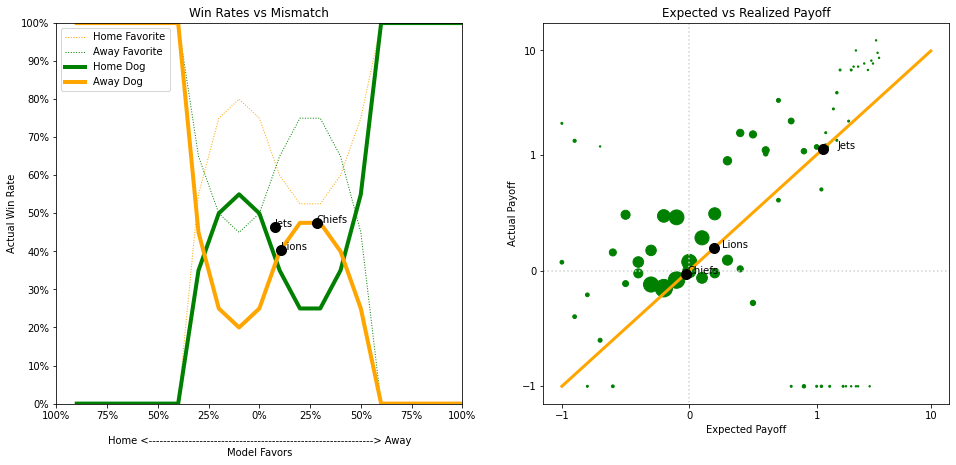

In [29]:
# predicting 
##########################################################
# format is ['away','home','awayML','homeML','date']

games = [
    ['det','gnb',195,-235,'2023-01-08'],
    ['kan','phi',105,-125,'2023-02-12'],
    ['buf','nyj',-475,360,'2022-11-06']]

##########################################################

for i in tqdm(games): 
    i.append(gogogo(i[2],i[3],     
    getstats(i[0],i[1],i[4]),False))

# displaying

rec = pd.DataFrame(games)
rec[list(range(5,5+len(rec.loc[0,5])))] = rec[5].apply(pd.Series)
rec.columns =  ['Away','Home','Away Odds','Home Odds','Date','Away Win Prob','Home Win Prob','Away EV','Home EV','Their Implied Win Probability','Classifier Difference','Better Value Team','Their Win Probability','Their EV']
rec['Away'] = rec['Away'].map(reverseDict)
rec['Home'] = rec['Home'].map(reverseDict)
rec['Bet On'] = [bvt if ev>evthresh else '' for bvt,ev in zip(rec['Better Value Team'],rec['Their EV'])]
rec.insert(loc=7, column='|', value=['|' for i in range(rec.shape[0])])

display(rec[['Date','Away','Home','|','Away Odds','Home Odds','Away Win Prob','Home Win Prob','Away EV','Home EV','|','Better Value Team','Their EV','Their Win Probability','Their Implied Win Probability','Classifier Difference','|','Bet On']].sort_values('Their EV',ascending=False))

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,7))

ax[0].plot(mismatch_agg['mismatch']*100,mismatch_agg['homefavwin_proba']*100,label='Home Favorite',linewidth=1,color='orange',linestyle='dotted')
ax[0].plot(mismatch_agg['mismatch']*100,mismatch_agg['awayfavwin_proba']*100,label='Away Favorite',linewidth=1,color='green',linestyle='dotted')
ax[0].plot(mismatch_agg['mismatch']*100,  mismatch_agg['homedogwin_proba']*100 ,label='Home Dog',linewidth=4,color='green')
ax[0].plot(mismatch_agg['mismatch']*100,  mismatch_agg['awaydogwin_proba']*100  ,label='Away Dog',linewidth=4,color='orange')
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter("%+g%%"))
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%+g%%"))
ax[0].set_xlabel('\nHome <--------------------------------------------------------------> Away\nModel Favors')
ax[0].set_yticks([0,10,20,30,40,50,60,70,80,90,100],['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
ax[0].set_xlim(-100,100)
ax[0].set_xticks([-100,-75,-50,-25,0,25,50,75,100],['100%','75%','50%','25%','0%','25%','50%','75%','100%'])
ax[0].set_ylim(0,100)
ax[0].set_title('Win Rates vs Mismatch')
ax[0].set_ylabel('Actual Win Rate')
ax[0].legend()

ax[1].axhline(y=0,xmin=-1,xmax=10,color='lightgrey',linestyle='dotted')
ax[1].axvline(x=0,ymin=-1,ymax=10,color='lightgrey',linestyle='dotted')
ax[1].set_title('Expected vs Realized Payoff')
ax[1].scatter(home_agg['home_binned'],home_agg['home_v'],s=home_agg['Key']*2,color='green')
ax[1].scatter(away_agg['away_binned'],away_agg['away_v'],s=away_agg['Key']*2,color='green')
ax[1].plot(away_agg['away_binned'],away_agg['away_binned'],color='orange',linewidth=3)
ax[1].set_yscale('symlog',linthresh=1)
ax[1].set_xscale('symlog',linthresh=1)
ax[1].set_xlabel('Expected Payoff')
ax[1].set_ylabel('Actual Payoff')
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
ax[1].yaxis.set_major_formatter(ticker.ScalarFormatter())

for i in rec[rec['Better Value Team']!='']['Classifier Difference']:
    j = rec[rec['Classifier Difference']==i]['Their Win Probability']
    k = rec[rec['Classifier Difference']==i]['Their EV']
    name = rec[rec['Classifier Difference']==i].reset_index()['Better Value Team'][0]

    ax[0].plot(i*100,j*100,marker='o',color='black',markersize=10)
    ax[0].text(i*100,j*100,name)

    ax[1].plot(k,k,marker='o',color='black',markersize=10)
    ax[1].text(k+(abs(k)/3),k,name)

plt.show()